In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:

# Carga del archivo
df = pd.read_csv("./data/songs_normalize.csv")

# Mostrar primeras filas
print(df.head())

# Resumen estadístico
print(df.describe())


           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

In [51]:
df = df.drop(columns=['danceability', 'energy', 'speechiness', 'key', 'mode', 
                      'loudness', 'instrumentalness', 'acousticness', 'liveness'])

# Verificar las primeras filas del DataFrame limpio
print(df.head())



           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  valence    tempo         genre  
0          77    0.894   95.053           pop  
1          79    0.684  148.726     rock, pop  
2          66    0.278  136.859  pop, country  
3          78    0.544  119.992   rock, metal  
4          65    0.879  172.656           pop  


#### Limpieza de datos

In [52]:
# Verificar valores nulos
print(df.isnull().sum())


artist         0
song           0
duration_ms    0
explicit       0
year           0
popularity     0
valence        0
tempo          0
genre          0
dtype: int64


In [53]:
#El resultado muestra que no hay valores nulos en ninguna columna. Esto significa que no es necesario imputar o eliminar registros debido a datos faltantes.

In [54]:
# Contar duplicados
print(df.duplicated().sum())


59


In [55]:
# Dividir géneros en múltiples filas
df = df.assign(genre=df['genre'].str.split(', ')).explode('genre')


In [56]:
# Convertir a booleanos si es necesario
df['explicit'] = df['explicit'].astype(bool)


In [57]:
# Identificar valores extremos
print(df['popularity'].describe())

count    3704.000000
mean       59.669006
std        21.036882
min         0.000000
25%        56.000000
50%        65.000000
75%        73.000000
max        89.000000
Name: popularity, dtype: float64


In [58]:
# Eliminar los decimales y convertir los valores en enteros
df['popularity'] = df['popularity'].round().astype(int)

# Reemplazar los valores 0 por 1
df['popularity'] = df['popularity'].replace(0, 1)

# Verificar el resultado
print(df['popularity'].head())


0    77
1    79
1    79
2    66
2    66
Name: popularity, dtype: int64


In [59]:
# Identificar valores extremos
print(df['popularity'].describe())

count    3704.000000
mean       59.730292
std        20.863661
min         1.000000
25%        56.000000
50%        65.000000
75%        73.000000
max        89.000000
Name: popularity, dtype: float64


In [60]:
# Identificar valores extremos
print(df['duration_ms'].describe())


count      3704.000000
mean     229655.527538
std       37580.557169
min      113000.000000
25%      205356.500000
50%      224886.500000
75%      249589.750000
max      484146.000000
Name: duration_ms, dtype: float64


In [61]:
    # Variables categóricas
df['genre'] = df['genre'].astype('category')
df['artist'] = df['artist'].astype('category')

# Variables numéricas
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')


In [62]:
# Validar unicidad
print(df[['artist', 'song']].duplicated().sum())

1778


In [63]:
# Detectar outliers en duration_ms
q1 = df['duration_ms'].quantile(0.25)
q3 = df['duration_ms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar outliers
outliers = df[(df['duration_ms'] < lower_bound) | (df['duration_ms'] > upper_bound)]
print(outliers)


           artist                song  duration_ms  explicit  year  \
24      Melanie C       I Turn To You       352173     False  1999   
24      Melanie C       I Turn To You       352173     False  1999   
25    Limp Bizkit  Take A Look Around       321040     False  2000   
28         Moloko     The Time Is Now       318280     False  2000   
28         Moloko     The Time Is Now       318280     False  2000   
...           ...                 ...          ...       ...   ...   
1939    Lil Nas X              Panini       114893     False  2019   
1939    Lil Nas X              Panini       114893     False  2019   
1966     Blueface            Thotiana       129264      True  2018   
1987    iann dior           gone girl       136568      True  2019   
1987    iann dior           gone girl       136568      True  2019   

      popularity  valence    tempo             genre  
24            54   0.0783  135.205               pop  
24            54   0.0783  135.205  Dance/Electro

In [64]:
# Eliminar duplicados
df = df.drop_duplicates()
print(f"Registros después de eliminar duplicados: {len(df)}")


Registros después de eliminar duplicados: 3588


In [65]:
# Dividir géneros en múltiples filas
df = df.assign(genre=df['genre'].str.split(', ')).explode('genre')

# Verificar los géneros únicos
print(df['genre'].value_counts())

genre
pop                  1582
hip hop               751
R&B                   437
Dance/Electronic      380
rock                  225
metal                  64
latin                  63
set()                  22
country                20
Folk/Acoustic          20
World/Traditional      10
easy listening          7
blues                   4
jazz                    2
classical               1
Name: count, dtype: int64


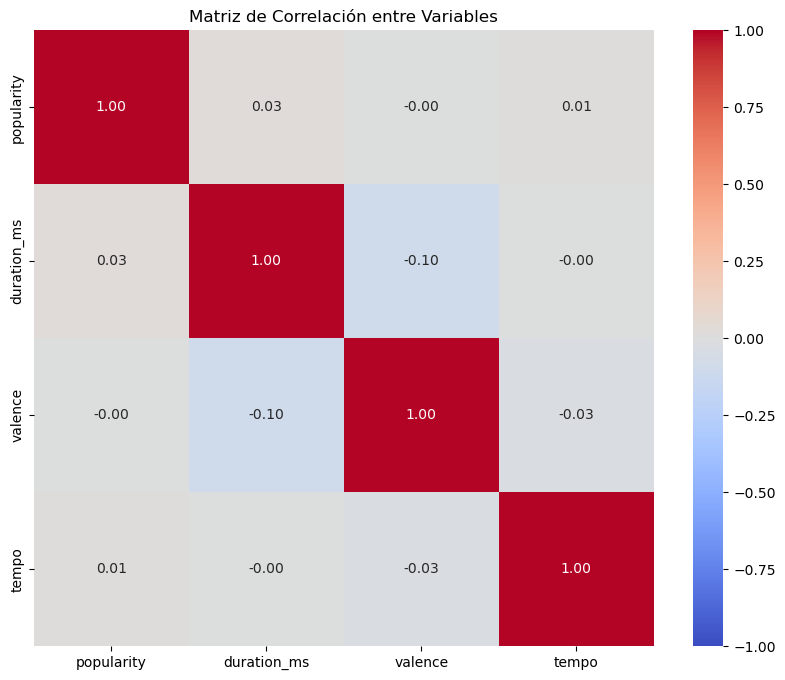

In [66]:


# Seleccionar las columnas numéricas relevantes para el análisis
numerical_columns = ['popularity', 'duration_ms', 'valence', 'tempo']

# Calcular la matriz de correlación
correlation_matrix = df[numerical_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables')
plt.show()


In [67]:
# Guardar la columna original
df['genre_original'] = df['genre']

# Crear dummies sin perder el género original
df = pd.get_dummies(df, columns=['genre'], prefix='genre', drop_first=True)

# Renombrar la columna 'genre_original' a 'genre'
df = df.rename(columns={'genre_original': 'genre'})

In [68]:
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values()
genre_mapping = {genre: idx for idx, genre in enumerate(genre_popularity.index)}
df['genre_ordinal'] = df['genre'].map(genre_mapping)


In [69]:
print(df.columns)

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'valence', 'tempo', 'genre', 'genre_Folk/Acoustic', 'genre_R&B',
       'genre_World/Traditional', 'genre_blues', 'genre_classical',
       'genre_country', 'genre_easy listening', 'genre_hip hop', 'genre_jazz',
       'genre_latin', 'genre_metal', 'genre_pop', 'genre_rock', 'genre_set()',
       'genre_ordinal'],
      dtype='object')


In [70]:
# Tamaño actual del dataset
print(f"Cantidad de registros: {df.shape[0]}")

# Estadísticas descriptivas para confirmar ajustes
print("\nEstadísticas descriptivas actualizadas:")
print(df['duration_ms'].describe())

# Verificar si quedan duplicados
duplicates = df.duplicated().sum()
print(f"\nDuplicados en el dataset: {duplicates}")

# Inspeccionar un pequeño subconjunto del dataset
print("\nPrimeras 5 filas del dataset limpio:")
print(df.head())


Cantidad de registros: 3588

Estadísticas descriptivas actualizadas:
count      3588.000000
mean     229522.870401
std       37681.055847
min      113000.000000
25%      205109.000000
50%      224673.000000
75%      249533.000000
max      484146.000000
Name: duration_ms, dtype: float64

Duplicados en el dataset: 0

Primeras 5 filas del dataset limpio:
           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   

   popularity  valence    tempo    genre  genre_Folk/Acoustic  ...  \
0          77    0.894   95.053      pop                False  ...   
1          79    0.684  148.726     rock                False

In [71]:
print (df.groupby('artist')['popularity'].mean().sort_values(ascending=False))

artist
Tom Odell             88.0
The Neighbourhood     87.0
WILLOW                86.0
Lewis Capaldi         84.0
Gesaffelstein         84.0
                      ... 
Basement Jaxx          1.0
BLACKPINK              1.0
Azealia Banks          1.0
Axwell /\ Ingrosso     1.0
Kungs                  1.0
Name: popularity, Length: 835, dtype: float64


/tmp/ipykernel_18235/636545051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print (df.groupby('artist')['popularity'].mean().sort_values(ascending=False))


In [72]:
# Reemplazar los valores de 'popularity' que son 0 por 0.1
df['popularity'] = df['popularity'].replace(0, 0.00001)

# Verificar los primeros registros para confirmar el cambio
print(df[['artist', 'popularity']].head())


           artist  popularity
0  Britney Spears          77
1       blink-182          79
1       blink-182          79
2      Faith Hill          66
2      Faith Hill          66


In [73]:
print (df.groupby('artist')['popularity'].mean().sort_values(ascending=False))

artist
Tom Odell             88.0
The Neighbourhood     87.0
WILLOW                86.0
Lewis Capaldi         84.0
Gesaffelstein         84.0
                      ... 
Basement Jaxx          1.0
BLACKPINK              1.0
Azealia Banks          1.0
Axwell /\ Ingrosso     1.0
Kungs                  1.0
Name: popularity, Length: 835, dtype: float64


/tmp/ipykernel_18235/636545051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print (df.groupby('artist')['popularity'].mean().sort_values(ascending=False))


In [74]:
# Eliminar las filas donde el año es 2020
df = df[df['year'] != 2020]

In [75]:
# Tamaño actual del dataset
print(f"Cantidad de registros: {df.shape[0]}")

# Estadísticas descriptivas para confirmar ajustes
print("\nEstadísticas descriptivas actualizadas:")
print(df['duration_ms'].describe())

# Verificar si quedan duplicados
duplicates = df.duplicated().sum()
print(f"\nDuplicados en el dataset: {duplicates}")

# Inspeccionar un pequeño subconjunto del dataset
print("\nPrimeras 5 filas del dataset limpio:")
print(df.head())

Cantidad de registros: 3583

Estadísticas descriptivas actualizadas:
count      3583.000000
mean     229538.968741
std       37698.159836
min      113000.000000
25%      205160.000000
50%      224693.000000
75%      249533.000000
max      484146.000000
Name: duration_ms, dtype: float64

Duplicados en el dataset: 0

Primeras 5 filas del dataset limpio:
           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   

   popularity  valence    tempo    genre  genre_Folk/Acoustic  ...  \
0          77    0.894   95.053      pop                False  ...   
1          79    0.684  148.726     rock                False

In [76]:
print(df.head())

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   

   popularity  valence    tempo    genre  genre_Folk/Acoustic  ...  \
0          77    0.894   95.053      pop                False  ...   
1          79    0.684  148.726     rock                False  ...   
1          79    0.684  148.726      pop                False  ...   
2          66    0.278  136.859      pop                False  ...   
2          66    0.278  136.859  country                False  ...   

   genre_country  genre_easy listening  genre_hip hop  genre_jazz  \
0          False                 False          False       False

In [77]:
# Guardar el DataFrame limpio en un archivo CSV
df.to_csv('./data//archivo_limpio.csv', index=False)


## Paso 1: Tendencias de géneros populares a través del tiempo

    Identificar cómo ha cambiado la popularidad de los géneros a lo largo de los años.
    Crear gráficos que muestren las tendencias de popularidad por género.

## Paso 2: Artistas más populares

    Determinar los artistas más escuchados en general y por año.
    Analizar si los artistas más populares están asociados a géneros específicos.

## Paso 3: Relación entre géneros y duración ajustada

    Ver si la duración promedio de canciones varía según el género.
    Identificar si géneros específicos tienen canciones más populares.

## Paso 4: Visualización y resumen para consultoras

    Preparar gráficos e insights clave para ayudar a tomar decisiones relacionadas con la organización de festivales.

#### 1. Análisis de tendencias de géneros populares a través del tiempo

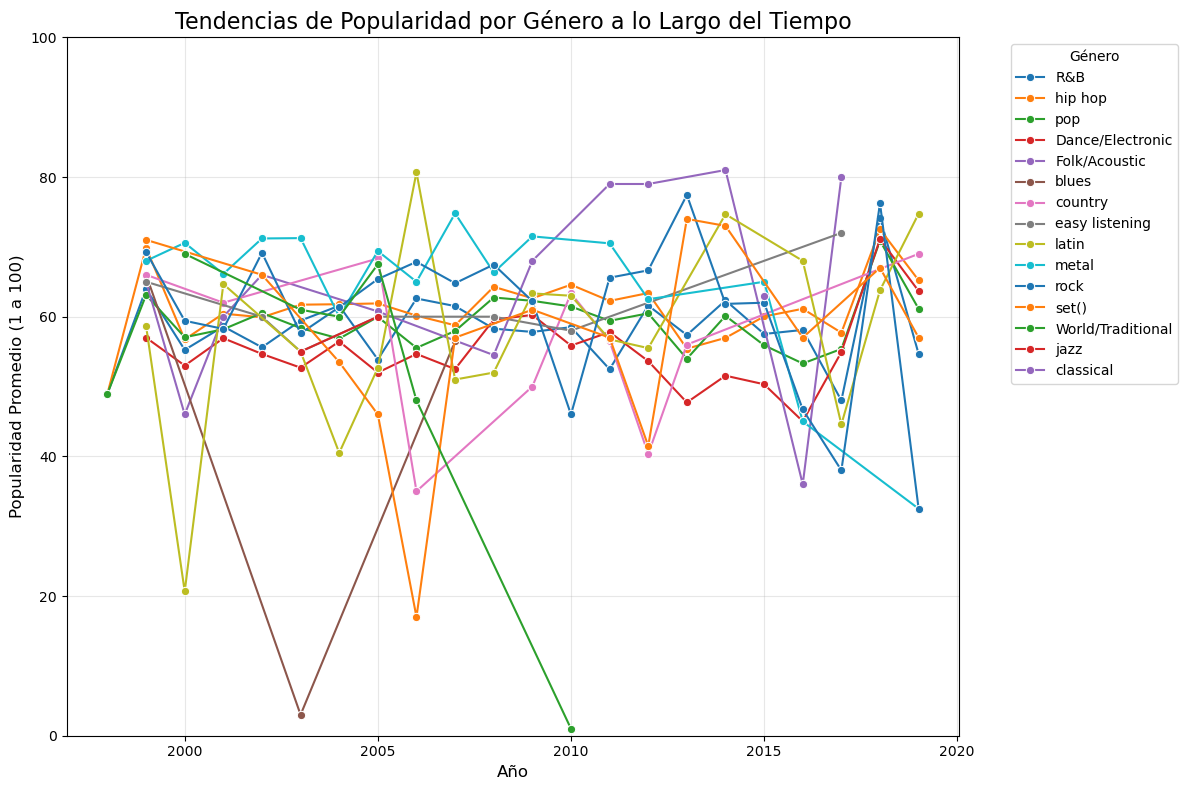

In [78]:
# Agrupar por año y género, y calcular la popularidad promedio
genre_trends = df.groupby(['year', 'genre'])['popularity'].mean().reset_index()

# Configurar el gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=genre_trends,
    x='year',
    y='popularity',
    hue='genre',
    marker='o',
    palette='tab10'
)

# Personalizar el gráfico
plt.title("Tendencias de Popularidad por Género a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Popularidad Promedio (1 a 100)", fontsize=12)
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

# Ajustar el rango del eje Y
plt.ylim(0, 100)

plt.tight_layout()

# Mostrar el gráfico
plt.show()



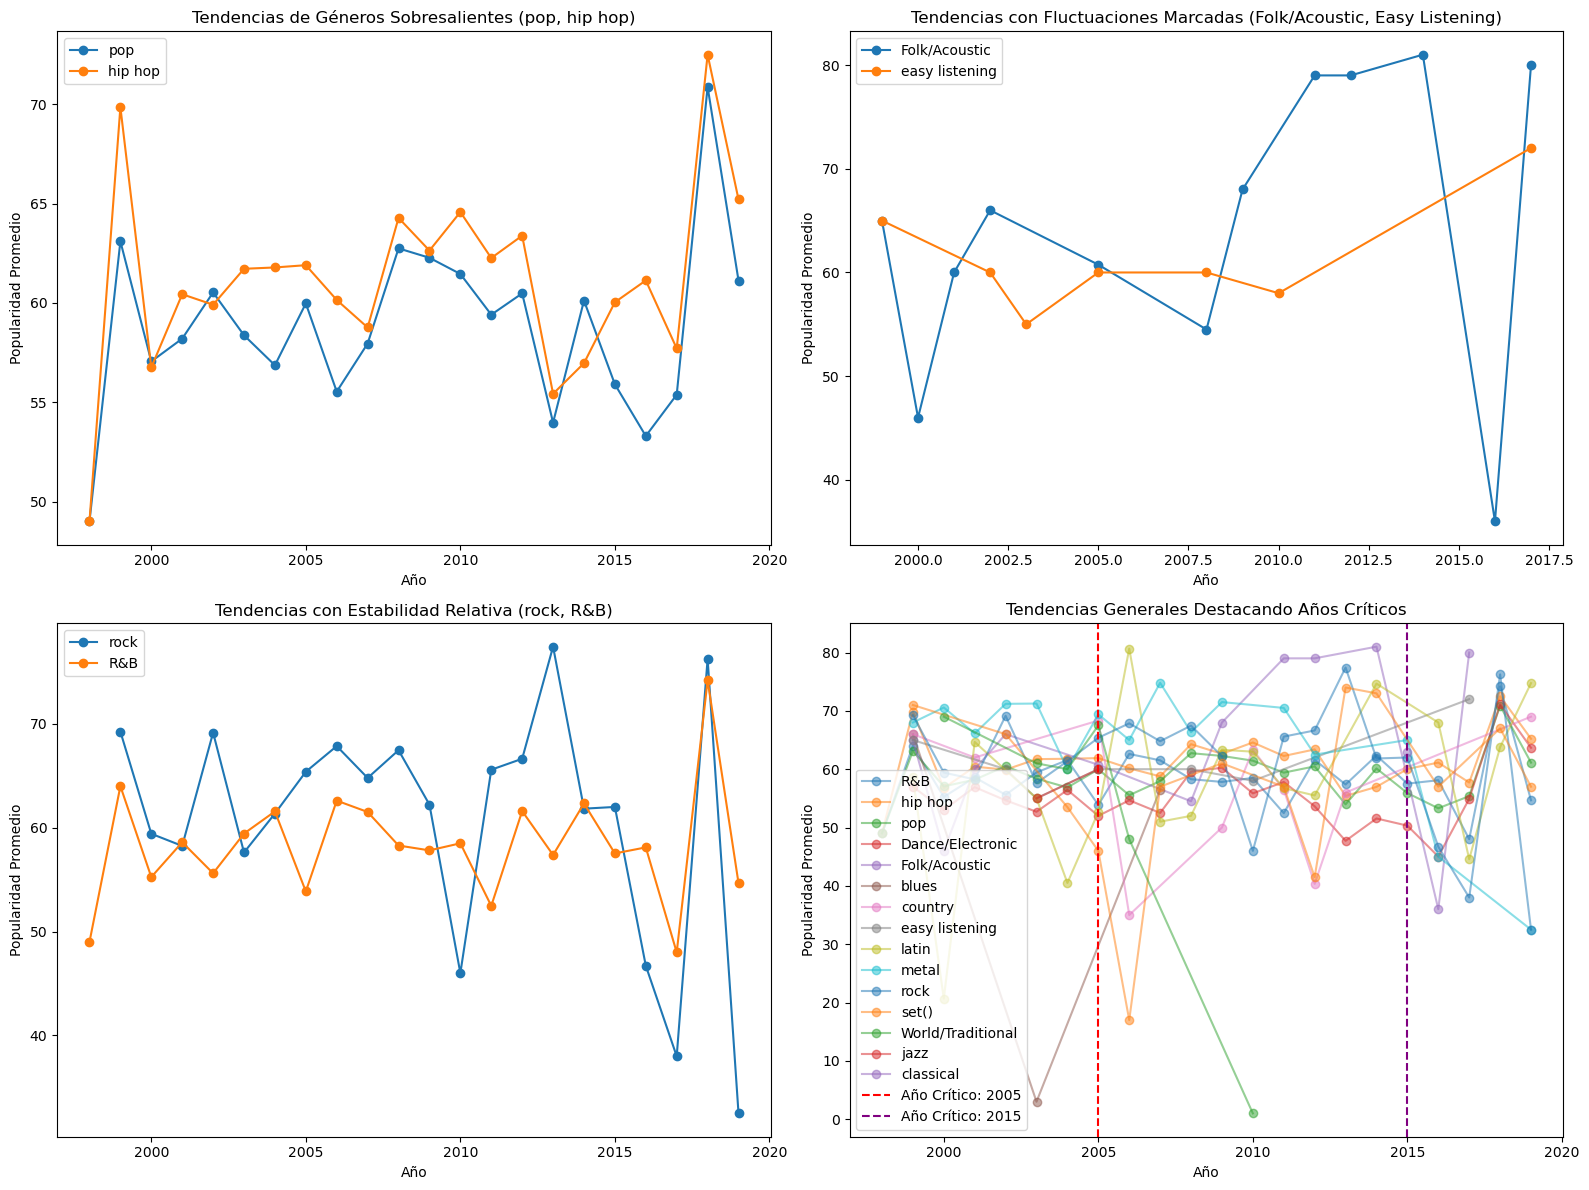

In [79]:
import matplotlib.pyplot as plt

# 1. Filtrar los géneros sobresalientes
genres_outstanding = ['pop', 'hip hop']
df_outstanding = genre_trends.loc[genre_trends['genre'].isin(genres_outstanding)]

# 2. Filtrar los géneros con fluctuaciones marcadas
genres_fluctuating = ['Folk/Acoustic', 'easy listening']
df_fluctuating = genre_trends.loc[genre_trends['genre'].isin(genres_fluctuating)]

# 3. Filtrar los géneros con estabilidad relativa
genres_stable = ['rock', 'R&B']
df_stable = genre_trends.loc[genre_trends['genre'].isin(genres_stable)]

# Crear subplots para las diferentes categorías
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Géneros sobresalientes
for genre in genres_outstanding:
    genre_data = df_outstanding[df_outstanding['genre'] == genre]
    axs[0, 0].plot(genre_data['year'], genre_data['popularity'], marker='o', label=genre)
axs[0, 0].set_title("Tendencias de Géneros Sobresalientes (pop, hip hop)")
axs[0, 0].set_xlabel("Año")
axs[0, 0].set_ylabel("Popularidad Promedio")
axs[0, 0].legend()

# 2. Fluctuaciones marcadas
for genre in genres_fluctuating:
    genre_data = df_fluctuating[df_fluctuating['genre'] == genre]
    axs[0, 1].plot(genre_data['year'], genre_data['popularity'], marker='o', label=genre)
axs[0, 1].set_title("Tendencias con Fluctuaciones Marcadas (Folk/Acoustic, Easy Listening)")
axs[0, 1].set_xlabel("Año")
axs[0, 1].set_ylabel("Popularidad Promedio")
axs[0, 1].legend()

# 3. Estabilidad relativa
for genre in genres_stable:
    genre_data = df_stable[df_stable['genre'] == genre]
    axs[1, 0].plot(genre_data['year'], genre_data['popularity'], marker='o', label=genre)
axs[1, 0].set_title("Tendencias con Estabilidad Relativa (rock, R&B)")
axs[1, 0].set_xlabel("Año")
axs[1, 0].set_ylabel("Popularidad Promedio")
axs[1, 0].legend()

# 4. Años críticos
for genre in genre_trends['genre'].unique():
    genre_data = genre_trends[genre_trends['genre'] == genre]
    axs[1, 1].plot(genre_data['year'], genre_data['popularity'], marker='o', label=genre, alpha=0.5)
axs[1, 1].axvline(2005, color='red', linestyle='--', label='Año Crítico: 2005')
axs[1, 1].axvline(2015, color='purple', linestyle='--', label='Año Crítico: 2015')
axs[1, 1].set_title("Tendencias Generales Destacando Años Críticos")
axs[1, 1].set_xlabel("Año")
axs[1, 1].set_ylabel("Popularidad Promedio")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [80]:
# Filtrar los últimos 3 años (por ejemplo, 2017, 2018, 2019)
df_last_3_years = df[df['year'] >= 2019]
# Filtrar los últimos 10 años 
df_last_10_years = df[df['year'] >= 2009]
# Filtrar los datos para el último año
df_last_year = df[df['year'] == 2019]


In [81]:
# Calcular la popularidad promedio por género para el último año
top_10_genres_last_year = (
    df_last_year.groupby('genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)  # Obtener los 10 géneros más populares
)

# Imprimir los 10 géneros más populares del último año
print(f"Top 10 géneros más populares del último año (2019)")
print(top_10_genres_last_year)


Top 10 géneros más populares del último año (2019)
genre
latin               74.750000
country             69.000000
hip hop             65.210526
Dance/Electronic    63.666667
pop                 61.126984
set()               57.000000
R&B                 54.666667
metal               32.500000
rock                32.500000
Name: popularity, dtype: float64


In [82]:

# Calcular la popularidad promedio por género para estos años
top_10_genres_last_3_years = (
    df_last_3_years.groupby('genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(top_10_genres_last_3_years)

genre
latin               74.750000
country             69.000000
hip hop             65.210526
Dance/Electronic    63.666667
pop                 61.126984
set()               57.000000
R&B                 54.666667
metal               32.500000
rock                32.500000
Name: popularity, dtype: float64


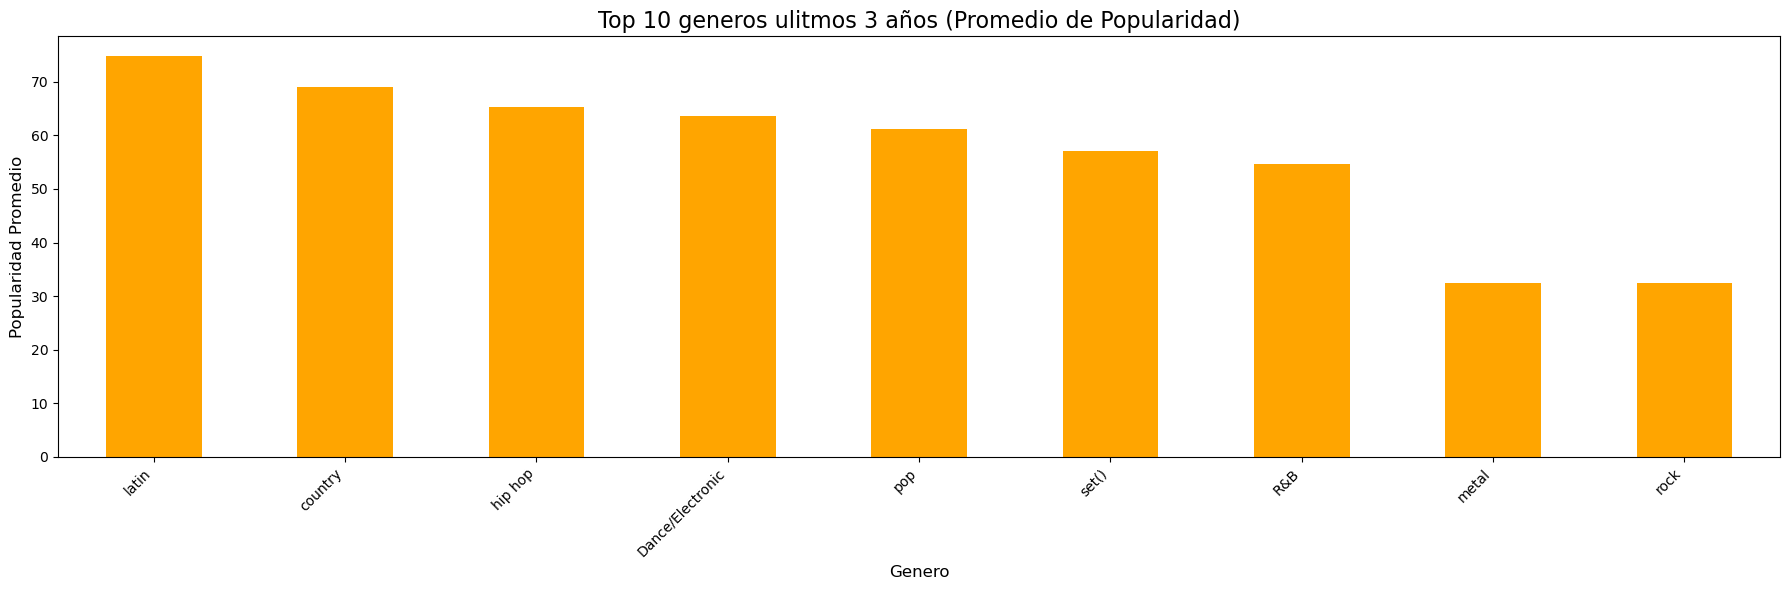

In [83]:
# Visualización
plt.figure(figsize=(18, 6))
top_10_genres_last_3_years.plot(kind='bar', color='orange')
plt.title('Top 10 generos ulitmos 3 años (Promedio de Popularidad)', fontsize=16)
plt.xlabel('Genero', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:

# Calcular la popularidad promedio por género para estos años
top_10_genres_last_10_years = (
    df_last_10_years.groupby('genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print(top_10_genres_last_10_years)

genre
Folk/Acoustic     65.571429
easy listening    65.000000
classical         63.000000
hip hop           62.639151
latin             61.975610
set()             61.333333
rock              60.715909
pop               59.351502
metal             59.000000
R&B               58.446667
Name: popularity, dtype: float64


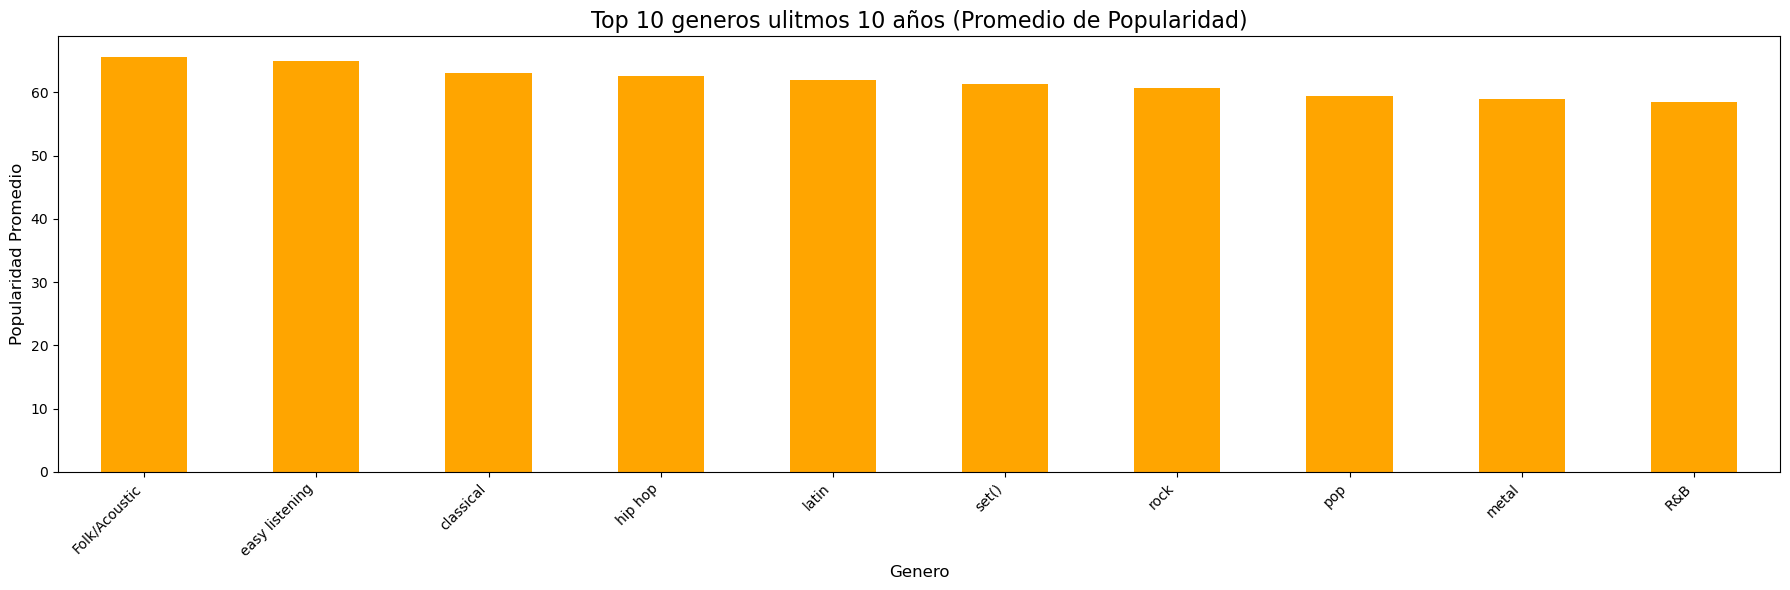

In [85]:
# Visualización
plt.figure(figsize=(18, 6))
top_10_genres_last_10_years.plot(kind='bar', color='orange')
plt.title('Top 10 generos ulitmos 10 años (Promedio de Popularidad)', fontsize=16)
plt.xlabel('Genero', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Paso 2: Artistas más populares

/tmp/ipykernel_18235/3619203289.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_artists_general = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(30)


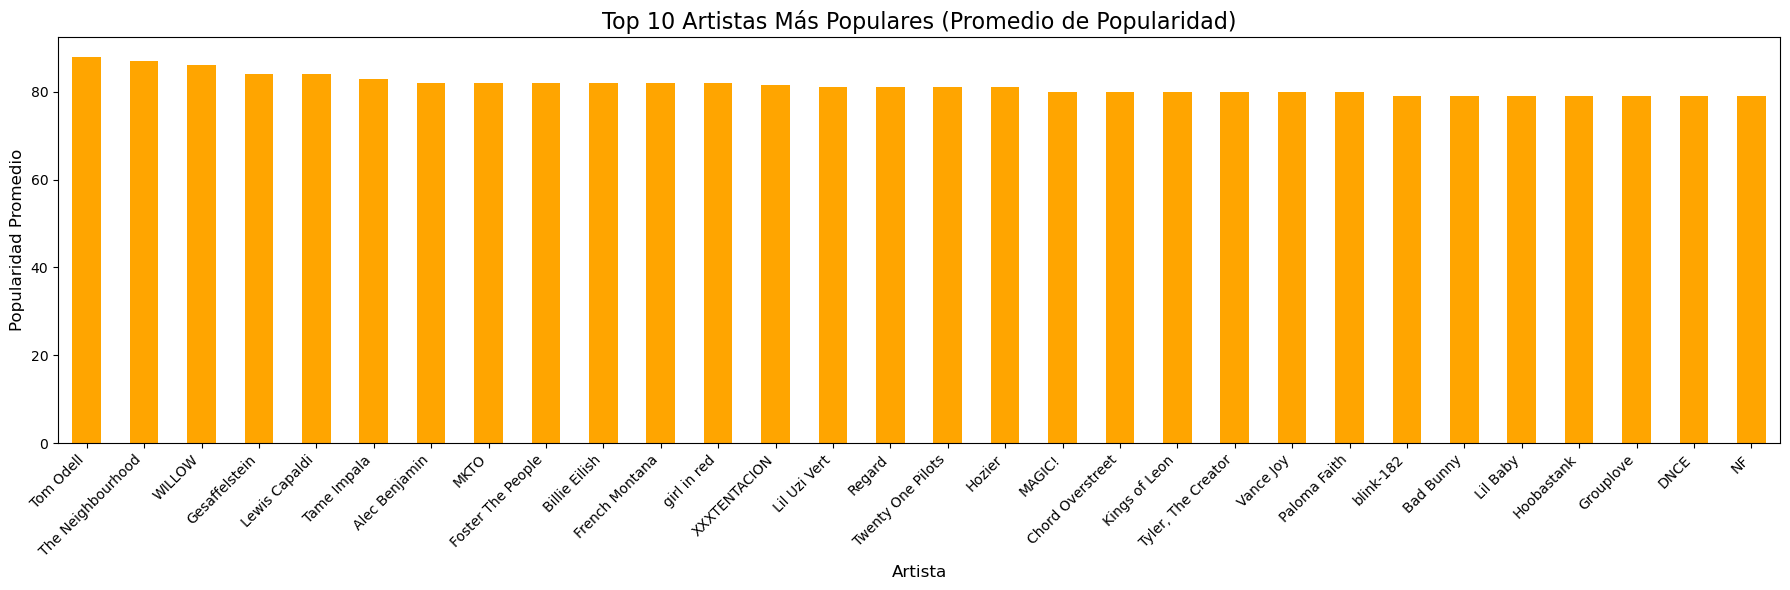

In [86]:
# Artistas más populares en general (promedio de popularidad)
top_artists_general = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(30)

# Visualización
plt.figure(figsize=(18, 6))
top_artists_general.plot(kind='bar', color='orange')
plt.title('Top 10 Artistas Más Populares (Promedio de Popularidad)', fontsize=16)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [87]:

# Calcular la popularidad promedio por artista para estos años
top_10_artist_last_3_years = df_last_3_years.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)
top_10_artist_last_3_years_clean = top_10_artist_last_3_years.dropna()
print(top_10_artist_last_3_years_clean)


artist
Lewis Capaldi         84.0
Gesaffelstein         84.0
Regard                81.0
Bad Bunny             81.0
Tyler, The Creator    80.0
J. Cole               80.0
Lana Del Rey          80.0
Dua Lipa              79.0
Daddy Yankee          79.0
Billie Eilish         79.0
Name: popularity, dtype: float64


/tmp/ipykernel_18235/1594692580.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_artist_last_3_years = df_last_3_years.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)


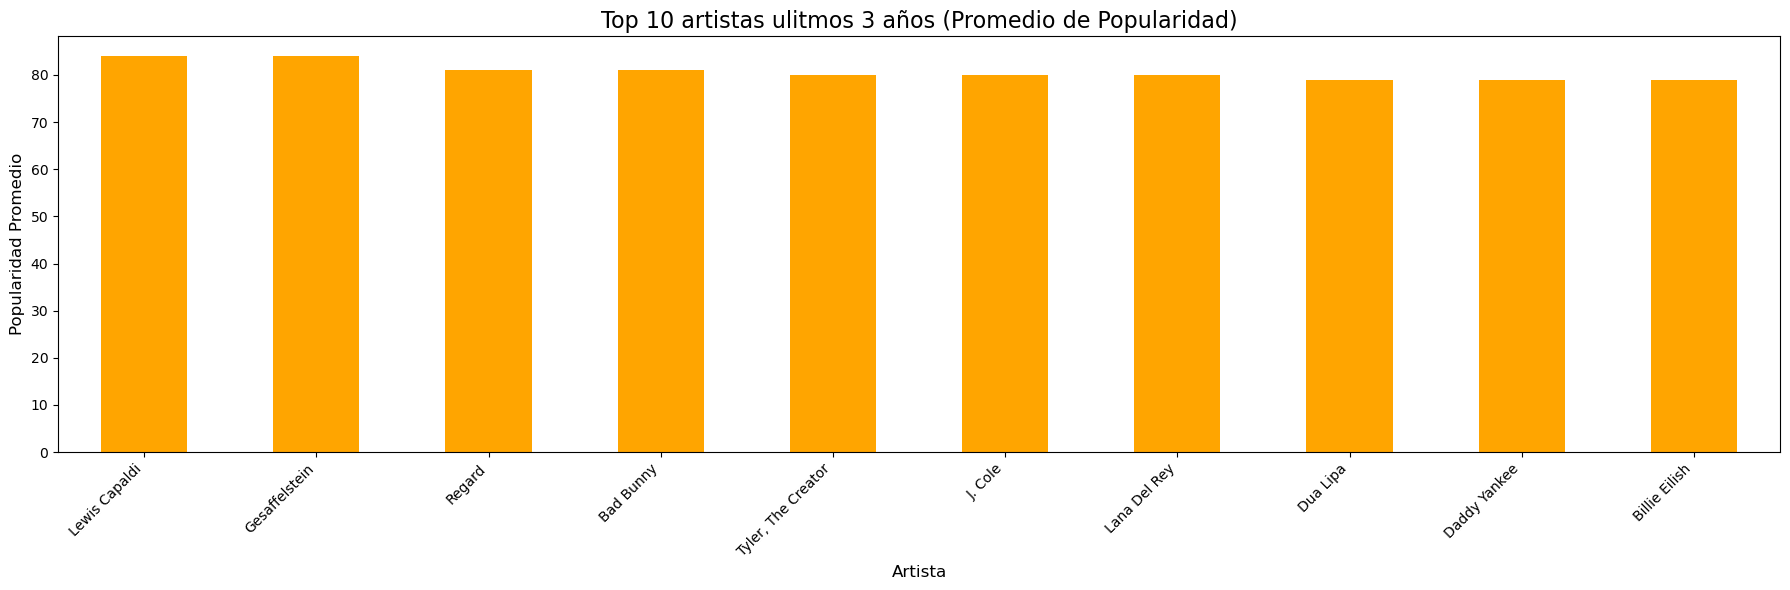

In [88]:
# Visualización
plt.figure(figsize=(18, 6))
top_10_artist_last_3_years_clean.plot(kind='bar', color='orange')
plt.title('Top 10 artistas ulitmos 3 años (Promedio de Popularidad)', fontsize=16)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
print (df.groupby('artist')['popularity'].mean().sort_values(ascending=False)
       )

artist
Tom Odell            88.0
The Neighbourhood    87.0
WILLOW               86.0
Gesaffelstein        84.0
Lewis Capaldi        84.0
                     ... 
The Lumineers         1.0
CNCO                  1.0
NSG                   NaN
Will Smith            NaN
t.A.T.u.              NaN
Name: popularity, Length: 835, dtype: float64


/tmp/ipykernel_18235/1866364638.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print (df.groupby('artist')['popularity'].mean().sort_values(ascending=False)


In [90]:

# Calcular la popularidad promedio por artista para estos años
top_10_last_10_years = df_last_10_years.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)
top_10_last_10_years_clean = top_10_last_10_years.dropna()

# Mostrar el resultado
print(top_10_last_10_years_clean)



artist
Tom Odell            88.0
The Neighbourhood    87.0
WILLOW               86.0
Arctic Monkeys       84.0
John Legend          84.0
Lewis Capaldi        84.0
Gesaffelstein        84.0
Tame Impala          83.0
Foster The People    82.0
Alec Benjamin        82.0
Name: popularity, dtype: float64


/tmp/ipykernel_18235/2296927961.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_last_10_years = df_last_10_years.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)


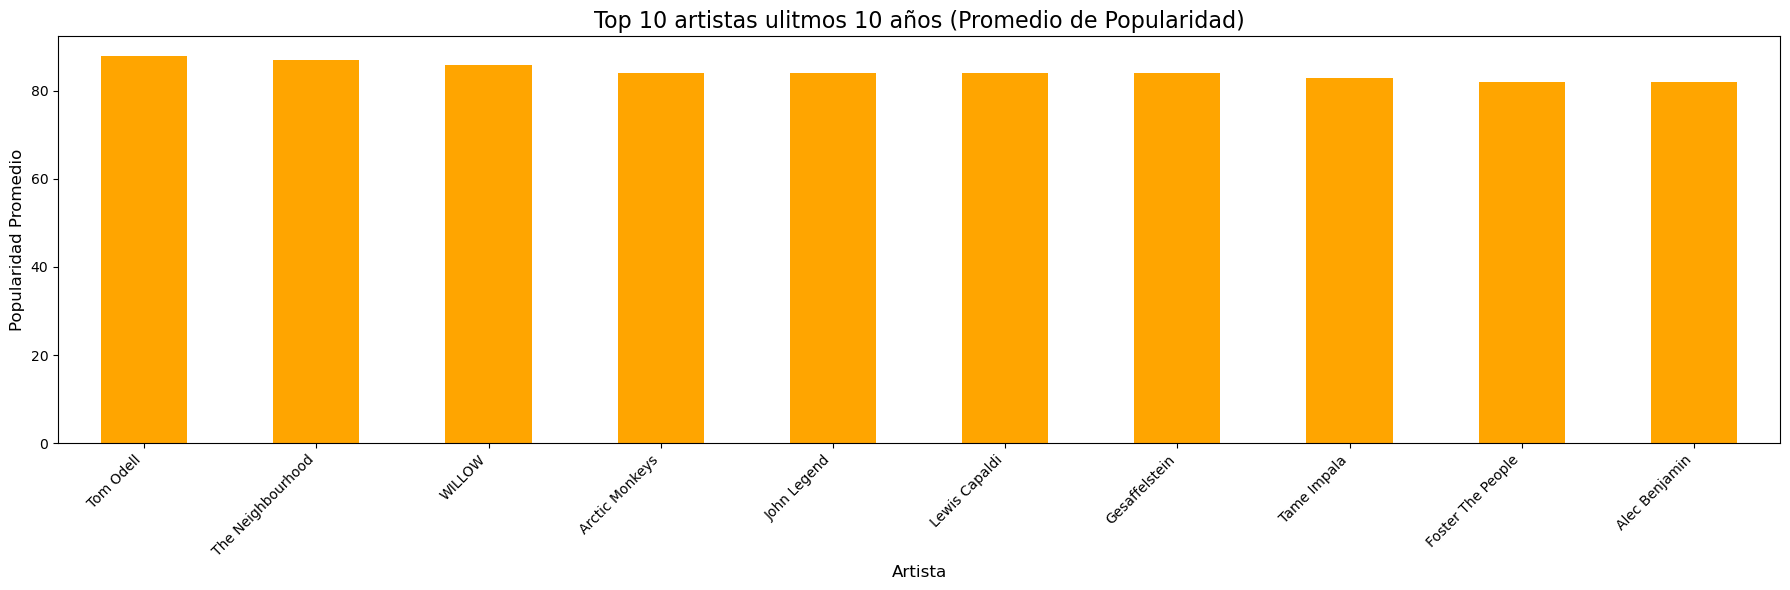

In [91]:
# Visualización
plt.figure(figsize=(18, 6))
top_10_last_10_years_clean.plot(kind='bar', color='orange')
plt.title('Top 10 artistas ulitmos 10 años (Promedio de Popularidad)', fontsize=16)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [92]:

# Calcular la popularidad promedio por género para estos años
top_10_genres_last_3_years = (
    df_last_3_years.groupby('genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(1)  # Obtener el género más popular
)

# Obtener el género más popular
most_popular_genre = top_10_genres_last_3_years.index[0]

# Filtrar los datos para el género más popular
df_genre_artists = df_last_3_years[df_last_3_years['genre'] == most_popular_genre]

# Calcular la popularidad promedio de los artistas dentro de ese género
top_5_artists_genre = df_genre_artists.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(5)

# Reemplazar los NaN por 1 si no hay artistas puntuados en popularidad dentro de ese género
top_5_artists_genre = top_5_artists_genre.fillna(1)

# Imprimir el género más popular y los 10 artistas más escuchados
print(f"Género más popular de los últimos 3 años: {most_popular_genre}")
print(top_5_artists_genre)




Género más popular de los últimos 3 años: latin
artist
Bad Bunny       81.0
Daddy Yankee    79.0
Anuel AA        75.5
Nicky Jam       74.0
Paulo Londra    72.0
Name: popularity, dtype: float64


/tmp/ipykernel_18235/2233084919.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_5_artists_genre = df_genre_artists.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(5)


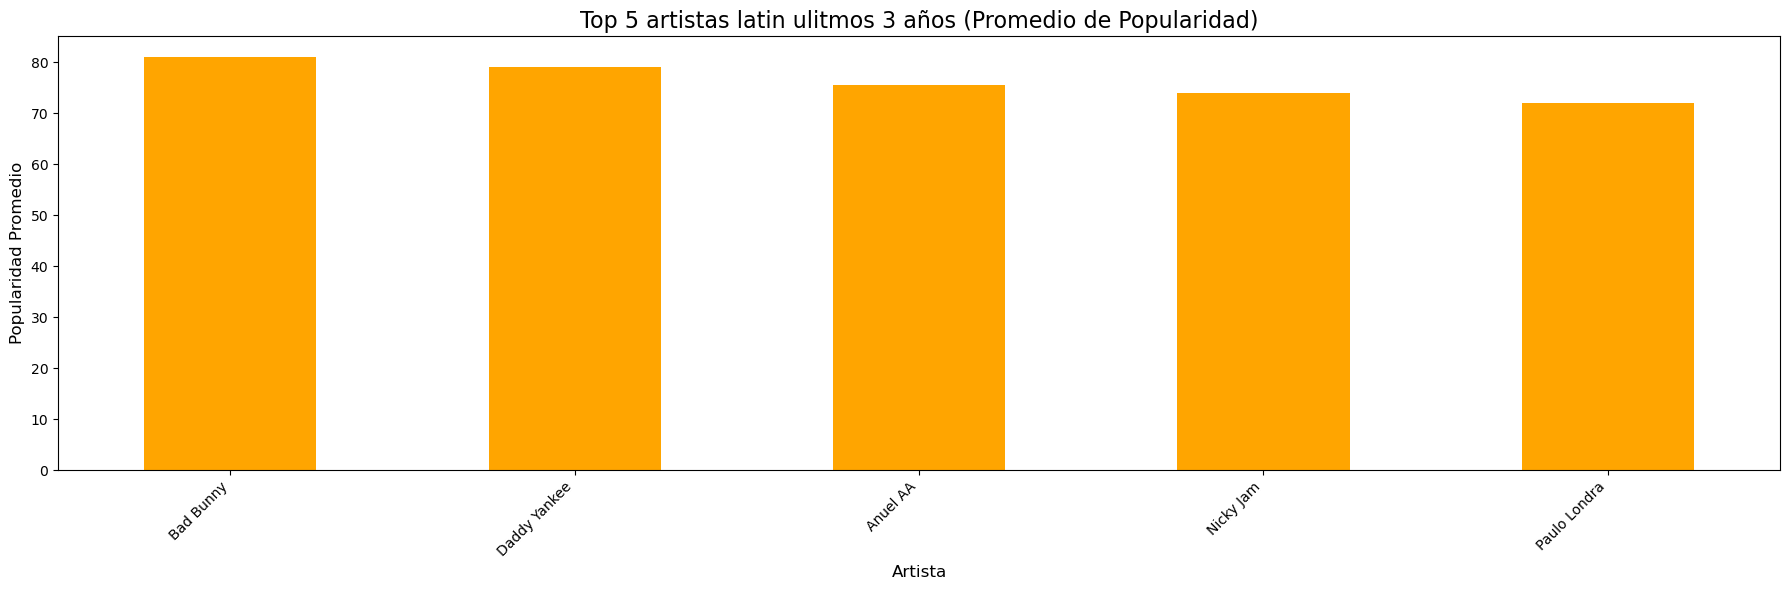

In [93]:
# Visualización
plt.figure(figsize=(18, 6))
top_5_artists_genre.plot(kind='bar', color='orange')
plt.title('Top 5 artistas latin ulitmos 3 años (Promedio de Popularidad)', fontsize=16)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [94]:
# Obtener el último año del DataFrame
last_year = df['year'].max()

# Filtrar los datos para el último año
df_last_year = df[df['year'] == last_year]

# Calcular la popularidad promedio por género para el último año
top_genres_last_year = (
    df_last_year.groupby('genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(1)  # Obtener el género más popular
)

# Obtener el género más popular del último año
most_popular_genre_last_year = top_genres_last_year.index[0]

# Filtrar los datos para el género más popular del último año
df_genre_artists_last_year = df_last_year[df_last_year['genre'] == most_popular_genre_last_year]

# Calcular la popularidad promedio de los artistas dentro de ese género para el último año
top_5_artists_genre_last_year = (
    df_genre_artists_last_year.groupby('artist')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Reemplazar los NaN por 1 si no hay artistas puntuados en popularidad dentro de ese género
top_5_artists_genre_last_year = top_5_artists_genre_last_year.fillna(1)

# Imprimir el género más popular y los 5 artistas más escuchados
print(f"Género más popular del último año ({last_year}): {most_popular_genre_last_year}")
print(top_5_artists_genre_last_year)


Género más popular del último año (2019): latin
artist
Bad Bunny       81.0
Daddy Yankee    79.0
Anuel AA        75.5
Nicky Jam       74.0
Paulo Londra    72.0
Name: popularity, dtype: float64


/tmp/ipykernel_18235/1660778830.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_genre_artists_last_year.groupby('artist')['popularity']


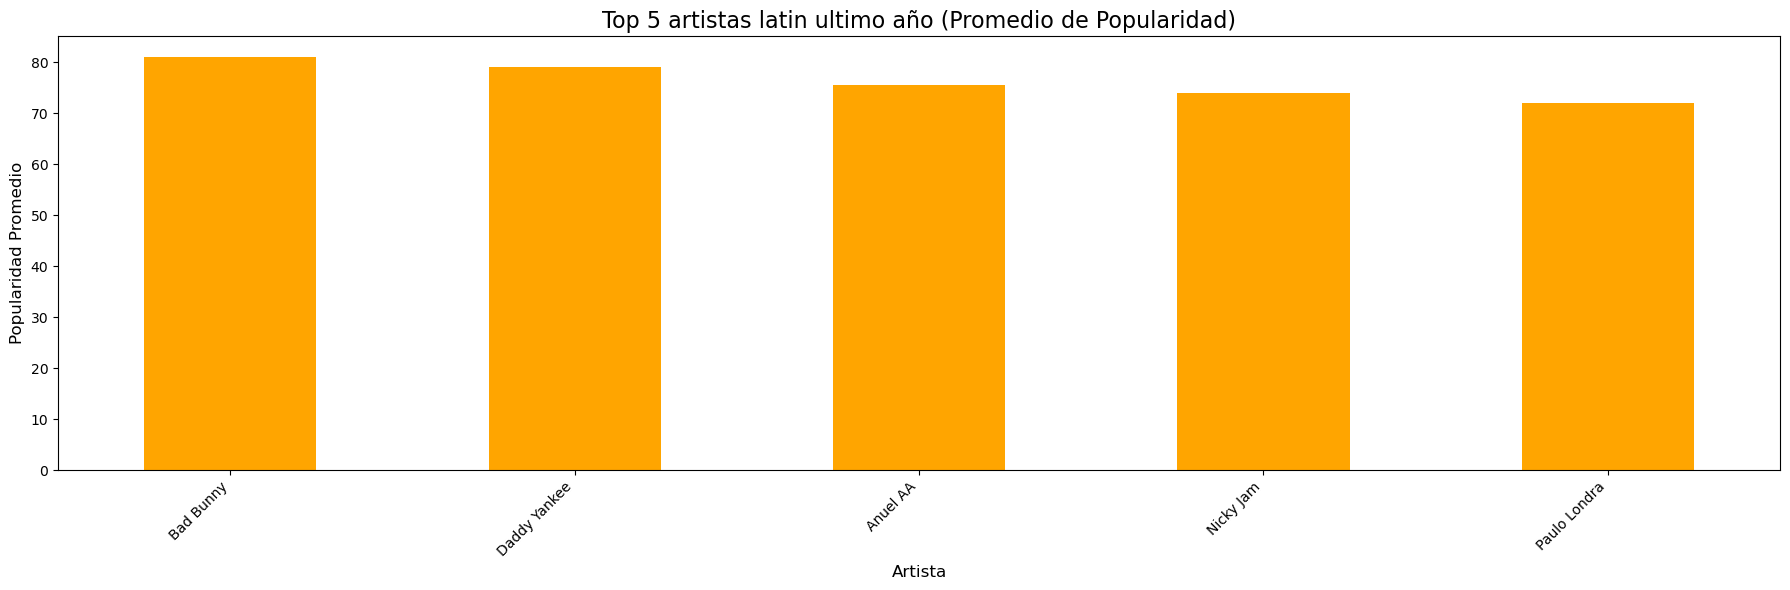

In [95]:
# Visualización
plt.figure(figsize=(18, 6))
top_5_artists_genre_last_year.plot(kind='bar', color='orange')
plt.title('Top 5 artistas latin ultimo año (Promedio de Popularidad)', fontsize=16)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Popularidad Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_18235/878518398.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_artists_2019 = df_last_20_years[df_last_20_years['year'] == 2019].groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10).index


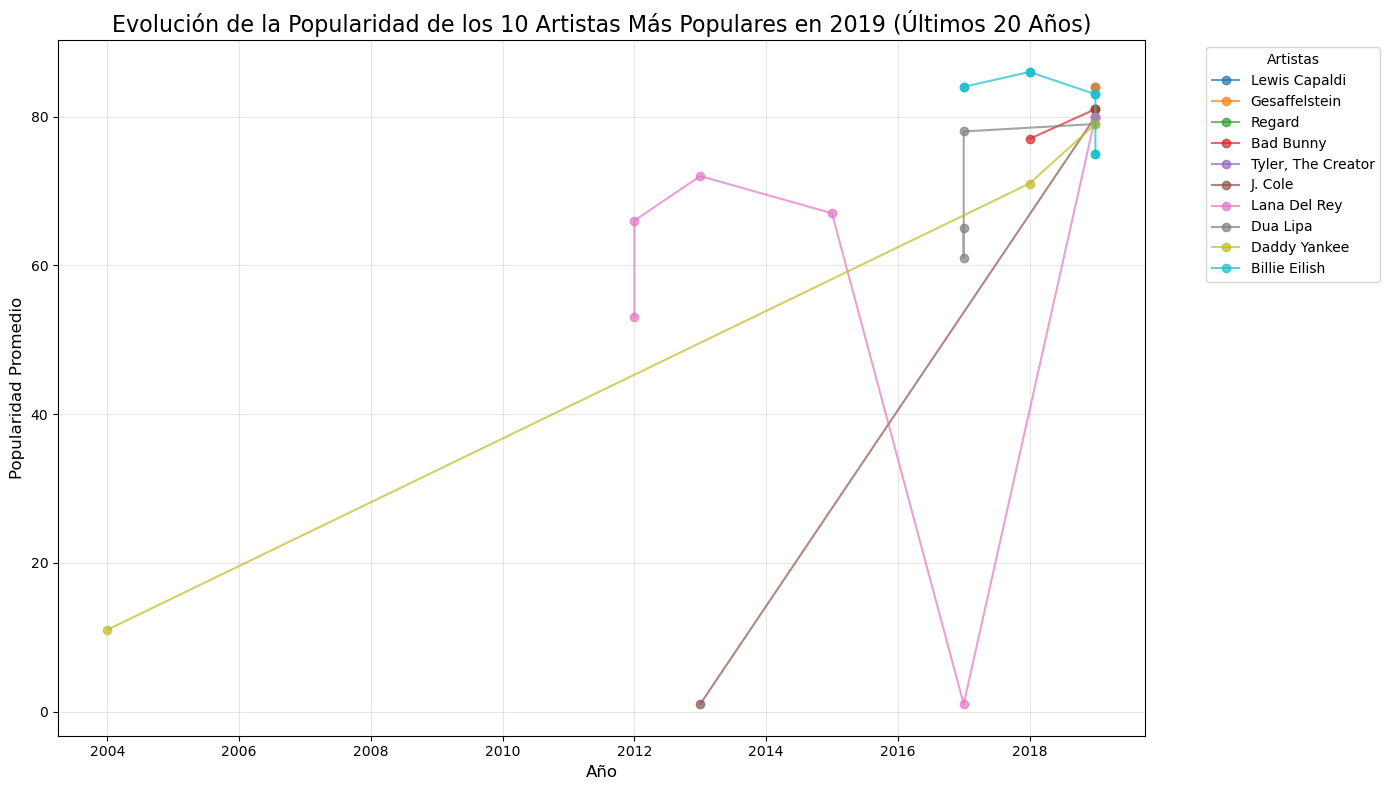

In [96]:
# Filtrar los datos para los últimos 20 años (hasta 2019)
df_last_20_years = df[df['year'] >= 2000]  # Puedes ajustar si es necesario

# Obtener los 10 artistas más populares según el último año (2019)
top_10_artists_2019 = df_last_20_years[df_last_20_years['year'] == 2019].groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10).index

# Filtrar los datos para los artistas más populares de 2019
df_top_10_artists = df_last_20_years[df_last_20_years['artist'].isin(top_10_artists_2019)]

# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar la evolución de la popularidad de los 10 artistas más populares de 2019
for artist in top_10_artists_2019:
    artist_data = df_top_10_artists[df_top_10_artists['artist'] == artist]
    plt.plot(artist_data['year'], artist_data['popularity'], marker='o', label=artist, alpha=0.7)

# Personalizar el gráfico
plt.title("Evolución de la Popularidad de los 10 Artistas Más Populares en 2019 (Últimos 20 Años)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Popularidad Promedio", fontsize=12)
plt.legend(title="Artistas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()